In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.5, flip_y=0.02, random_state=42)
X_orig = X.copy()
df = pd.DataFrame(X_orig, columns=['CGPA', 'Internship_Score'])
df['Placement_Status'] = y
df.head()

,CGPA,Internship_Score,Placement_Status
0,2.186782,0.688474,1
1,2.312657,0.898094,1
2,1.306838,1.764684,1
3,0.571282,-2.061898,0
4,2.049571,-1.273692,0


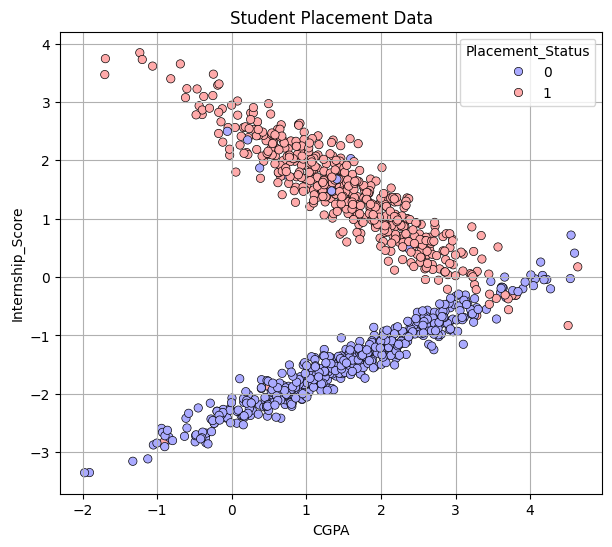

In [3]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='CGPA', y='Internship_Score', hue='Placement_Status', palette='bwr', edgecolor='k')
plt.title("Student Placement Data")
plt.grid(True)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, verbose=0)

In [6]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 95.00%
